In [1]:
!pip install tf-nightly
import tensorflow_datasets as tfds
import tensorflow as tf

     |████████████████████████████████| 325.1MB 49kB/s 
     |████████████████████████████████| 460kB 43.8MB/s 
     |████████████████████████████████| 12.2MB 46.8MB/s 


In [2]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric],'')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric,'val_'+metric])
  plt.show()

In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteEEJVUR/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteEEJVUR/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteEEJVUR/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
encoder = info.features['text'].encoder

In [5]:
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [6]:
sample_string = 'Hello Tensorflow.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 2934, 7975]
The original string: "Hello Tensorflow."


In [7]:
assert original_string == sample_string

In [8]:
for index in encoded_string:
  print('{} -----> {}'.format(index, encoder.decode([index])))

4025 -----> Hell
222 -----> o 
6307 -----> Ten
2327 -----> sor
2934 -----> flow
7975 -----> .


In [9]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [10]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [14]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [15]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)
test_loss, test_acc = model.evaluate(test_dataset)

Epoch 1/10
391/391 [==============================] - 802s 2s/step - loss: 0.6855 - accuracy: 0.5123 - val_loss: 0.4943 - val_accuracy: 0.7937
Epoch 2/10
391/391 [==============================] - 802s 2s/step - loss: 0.3763 - accuracy: 0.8390 - val_loss: 0.3411 - val_accuracy: 0.8641
Epoch 3/10
391/391 [==============================] - 848s 2s/step - loss: 0.2516 - accuracy: 0.9029 - val_loss: 0.3286 - val_accuracy: 0.8641
Epoch 4/10
391/391 [==============================] - 844s 2s/step - loss: 0.2049 - accuracy: 0.9250 - val_loss: 0.3523 - val_accuracy: 0.8661
Epoch 5/10
391/391 [==============================] - 853s 2s/step - loss: 0.1756 - accuracy: 0.9370 - val_loss: 0.3649 - val_accuracy: 0.8682
Epoch 6/10
391/391 [==============================] - 852s 2s/step - loss: 0.1560 - accuracy: 0.9465 - val_loss: 0.3823 - val_accuracy: 0.8573
Epoch 7/10
391/391 [==============================] - 844s 2s/step - loss: 0.1399 - accuracy: 0.9509 - val_loss: 0.4111 - val_accuracy: 0.8589

In [16]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 186s 476ms/step - loss: 0.4274 - accuracy: 0.8551
Test Loss: 0.4273543655872345
Test Accuracy: 0.8551200032234192


In [17]:
def pad_to_size(vec, size):
  zeros=[0]*(size-len[vec])
  vec.extend[zeros]
  return vec

In [18]:
def sample_predict(sample_pred_text,pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text,64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions) 

In [24]:
#predict on a sample test without padding.

sample_pred_text = ('The item was not good and helpfull. '
                    'It ruined our room.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[0.33519286]]


In [28]:
#predict on a sample test without padding.

sample_pred_text = ('The item was not good and helpfull. '
                    'It ruined our room.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[0.33519286]]


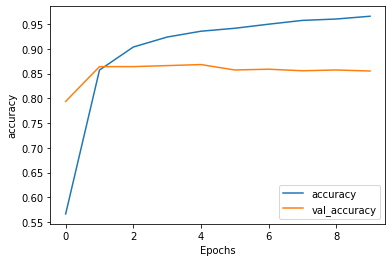

In [29]:
plot_graphs(history, 'accuracy')

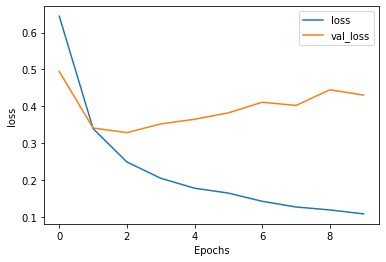

In [30]:
plot_graphs(history, 'loss')